<function matplotlib.pyplot.show(*args, **kw)>

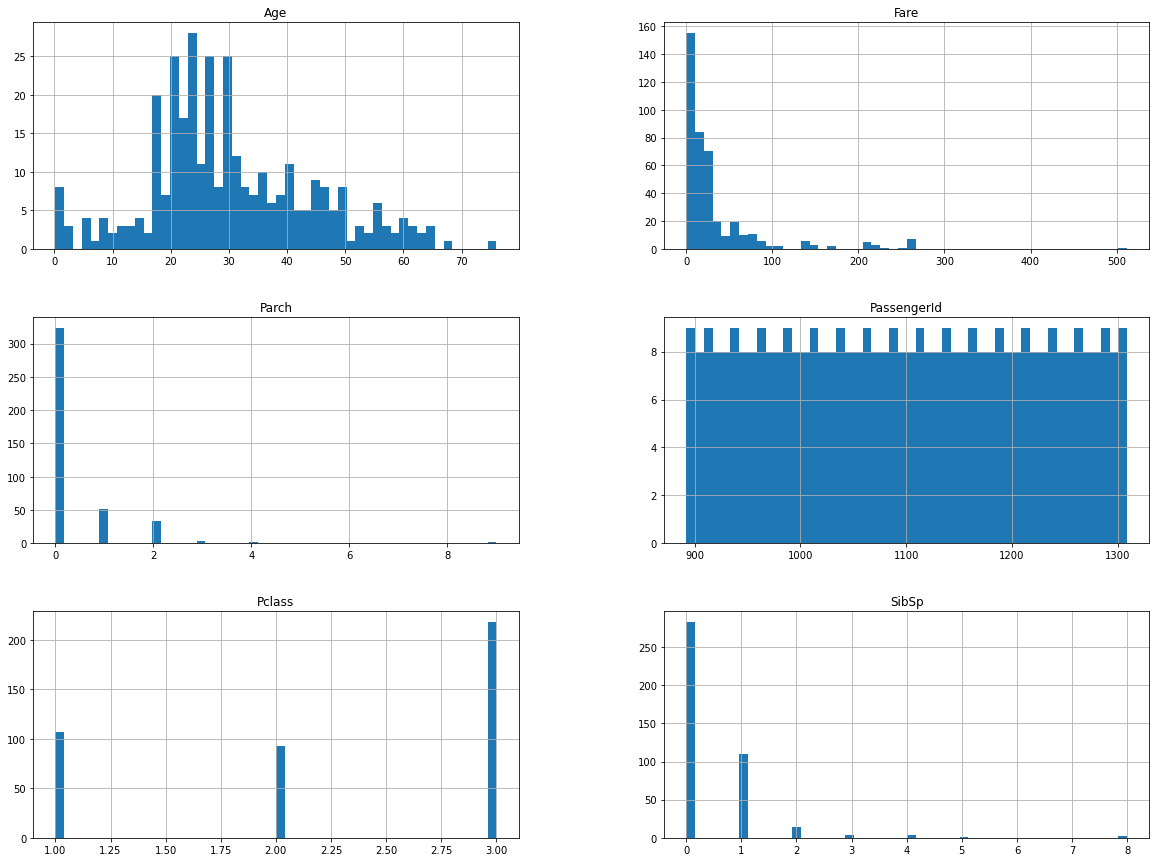

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_name):
    return pd.read_csv(file_name)

training_data = load_data("train.csv")
testing_data = load_data("test.csv")

training_data.head()
testing_data.hist(bins=50, figsize=(20,15))
PassengerId = testing_data["PassengerId"]
plt.show

In [179]:
#ONLY RUN ONCE
test_data = testing_data.copy()
def process_data(data):
    data.drop("Cabin", axis=1, inplace=True)
    data.drop("Ticket", axis=1, inplace=True)
    data.drop("Name", axis=1, inplace=True)
    data.drop("PassengerId", axis=1, inplace=True)
    data.dropna(subset=["Age"], inplace=True)
    data.dropna(subset=["Embarked"], inplace=True)
    print(data.head(100))
    return data

print("Nones removed")

training_data = process_data(training_data)
test_data = process_data(testing_data)
print(training_data)

Nones removed
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
122         0       2    male  32.5      1      0  30.0708        C
123         1       2  female  32.5      0      0  13.0000        S
124         0       1    male  54.0      0      1  77.2875        S
125         1       3    male  12.0      1      0  11.2417        C
127         1       3    male  24.0      0      0   7.1417        S

[100 rows x 8 columns]
     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         3    male  34.5      0      0   7.8292        Q
1         3  female  47.0     

In [180]:
num_data = training_data.copy()
num2_data = test_data.copy()
t_data = test_data.copy()
data = training_data.copy()

def remove_categories(data):
    data.drop("Sex", axis=1, inplace=True)
    data.drop("Embarked", axis=1, inplace=True)
remove_categories(num_data)
remove_categories(num2_data)

survived = training_data["Survived"].copy()
training_data.drop("Survived", axis=1, inplace=True)
#survived_t = testing_data["Survived"].copy()
print(num_data.head())

   Survived  Pclass   Age  SibSp  Parch     Fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


In [204]:
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(num_data)
num2_attribs = list(num2_data) 
cat_attrib1 = ["Sex"]
cat_attrib2 = ["Embarked"]

#print(training_data["Name"])

def pipelines(i_d, n_attrib):
    num_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
    ])

    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, n_attrib),
        ("cat1", OneHotEncoder(), cat_attrib1),
        ("cat2", OneHotEncoder(), cat_attrib2),
    ])
    
    return full_pipeline.fit_transform(i_d)


titanic_prepared = pipelines(data, num_attribs)
print(titanic_prepared)
testing_prepared = pipelines(t_data, num2_attribs)
print(testing_prepared)

[[-0.82416338  0.90859974 -0.52766856 ...  0.          0.
   1.        ]
 [ 1.21335165 -1.48298257  0.57709388 ...  1.          0.
   0.        ]
 [ 1.21335165  0.90859974 -0.25147795 ...  0.          0.
   1.        ]
 ...
 [ 1.21335165 -1.48298257 -0.73481151 ...  0.          0.
   1.        ]
 [ 1.21335165 -1.48298257 -0.25147795 ...  1.          0.
   0.        ]
 [-0.82416338  0.90859974  0.16280796 ...  0.          1.
   0.        ]]
[[ 1.01232494  0.29854934 -0.55218394 ...  0.          1.
   0.        ]
 [ 1.01232494  1.18132793  0.59359773 ...  0.          0.
   1.        ]
 [-0.17109717  2.24066224 -0.55218394 ...  0.          1.
   0.        ]
 ...
 [ 1.01232494 -0.16049553 -0.55218394 ...  0.          0.
   1.        ]
 [-1.35451929  0.61634963 -0.55218394 ...  1.          0.
   0.        ]
 [ 1.01232494  0.58103849 -0.55218394 ...  0.          0.
   1.        ]]


In [202]:
from sklearn.linear_model import LinearRegression
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(titanic_prepared, survived)

print(testing_prepared)

some_data = pd.DataFrame(testing_prepared).iloc[:100]
some_labels = survived.iloc[:100]
predictions = lin_reg.predict(some_data)
final_answer = [round(num) for num in predictions]
print("Predictions: ", final_answer)
print("Labels: ", list(some_labels))

[[ 1.01232494  0.29854934 -0.55218394 ...  0.          1.
   0.        ]
 [ 1.01232494  1.18132793  0.59359773 ...  0.          0.
   1.        ]
 [-0.17109717  2.24066224 -0.55218394 ...  0.          1.
   0.        ]
 ...
 [ 1.01232494 -0.16049553 -0.55218394 ...  0.          0.
   1.        ]
 [-1.35451929  0.61634963 -0.55218394 ...  1.          0.
   0.        ]
 [ 1.01232494  0.58103849 -0.55218394 ...  0.          0.
   1.        ]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 10)

In [187]:
answer = []
'''
print(PassengerId)

testing_prepared = pd.DataFrame(testing_prepared)
print(testing_prepared.head())
testing_prepared.apply(lambda x: x.fillna(x.value_counts().index[0], inplace=True))
np.array(testing_prepared, dtype=np.int64)
print(np.any(np.isnan(testing_prepared)))'''

data_to_pred = pd.DataFrame(testing_prepared)
pred = lin_reg.predict(data_to_pred)
final_pred = [round(num) for num in pred]
print(final_pred)

'''
for i in range(417):
    answer.append([PassengerId[i], final_pred[i]])
answer_df = pd.DataFrame(answer, columns = ["PassengerId", "Survived"])'''
#print(len(answer_df))
#answer_df.to_csv("answer.csv")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').